In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
os.getcwd()
#os.chdir('/kaggle/input/flowers')
# Any results you write to the current directory are saved as output.

'/kaggle/working/flowers'

In [75]:
os.chdir('/kaggle')
os.getcwd()
os.listdir()

['working', 'lib', 'config', 'input']

In [76]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [77]:
from fastai import *
from fastai.vision import *

In [78]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [79]:
classes = ['daisy','dandelion','rose','sunflower','tulip']

In [80]:
for c in classes:
    path = Path('/kaggle/working/flowers/')
    path_old=Path('/kaggle/input/flowers/flowers')
    dest = path/c
    dest.mkdir(parents=True, exist_ok=True)
    
    

In [81]:
os.chdir('/kaggle/working/flowers')
os.listdir()

['rose', 'tulip', 'sunflower', 'daisy', 'models', 'dandelion']

In [82]:
os.listdir('/kaggle/input/flowers/flowers')

['sunflower', 'tulip', 'daisy', 'rose', 'dandelion']

In [83]:
os.listdir('/kaggle/input/flowers/flowers/daisy')

['2877860110_a842f8b14a_m.jpg',
 '519880292_7a3a6c6b69.jpg',
 '14307766919_fac3c37a6b_m.jpg',
 '3720632920_93cf1cc7f3_m.jpg',
 '105806915_a9c13e2106_n.jpg',
 '2573240560_ff7ffdd449.jpg',
 '8616684075_71923bb771_n.jpg',
 '5769217520_c90efc3c93_m.jpg',
 '8742143296_fed9fa007c.jpg',
 '34571214621_f655295459_n.jpg',
 '14564545365_1f1d267bf1_n.jpg',
 '33837577463_1ae52a3726_n.jpg',
 '20773528301_008fcbc5a1_n.jpg',
 '2590291468_2635d3e4e0_n.jpg',
 '16737503507_431768a927.jpg',
 '19653086178_28156b7ce4_m.jpg',
 '422094774_28acc69a8b_n.jpg',
 '22244161124_53e457bb66_n.jpg',
 '10172567486_2748826a8b.jpg',
 '5896676090_68bb74b1e9_n.jpg',
 '5885826924_38fdc6bcaa_n.jpg',
 '8008629838_c62bb2b016_n.jpg',
 '16360180712_b72695928c_n.jpg',
 '15306268004_4680ba95e1.jpg',
 '4538877108_3c793f7987_m.jpg',
 '506018088_4f7a15a7c5_n.jpg',
 '11124324295_503f3a0804.jpg',
 '4613992315_143ccc2a10_m.jpg',
 '3326037909_b5ae370722_n.jpg',
 '4117918318_3c8935289b_m.jpg',
 '3456403987_5bd5fa6ece_n.jpg',
 '34266042310_

In [84]:
file_list=os.listdir('/kaggle/input/flowers/flowers/daisy')

In [85]:
import shutil

# move the test images from the images directory to the test directory
for c in classes:
    print(c)
    path='/kaggle/input/flowers/flowers'
    file_list=os.listdir(str(path)+'/'+str(c))
    for i in file_list:
        shutil.copy('/kaggle/input/flowers/flowers/'+str(c)+'/'+str(i),'/kaggle/working/flowers/'+str(c))
    

daisy
dandelion
rose
sunflower
tulip


In [86]:
p_daisy=Path('/kaggle/working/flowers/daisy')
verify_images(p_daisy, delete=True, max_size=500)

len(os.listdir('/kaggle/working/flowers/daisy'))

769

In [87]:
path=Path('/kaggle/working/flowers/')
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

daisy


dandelion


rose


sunflower


tulip


In [88]:
path=Path('/kaggle/working/flowers/')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [89]:
print("Total ",data.c," classes in data namely",data.classes)

Total  5  classes in data namely ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


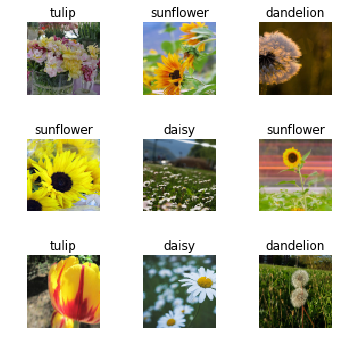

In [90]:
data.show_batch(rows=3, figsize=(5,5))

In [91]:
doc(cnn_learner)

In [92]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [93]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.178004,0.762321,0.281250,00:29
1,0.907691,0.673731,0.234954,00:28
2,0.797276,0.615213,0.223380,00:28
3,0.680741,0.558136,0.204861,00:30
4,0.610605,0.517785,0.202546,00:28
5,0.570361,0.522332,0.194444,00:28
6,0.502520,0.507961,0.195602,00:28
7,0.465721,0.483554,0.170139,00:27
8,0.444400,0.492198,0.174769,00:28
9,0.419008,0.490148,0.177083,00:27


In [94]:
learn.save('stage-1')

In [95]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

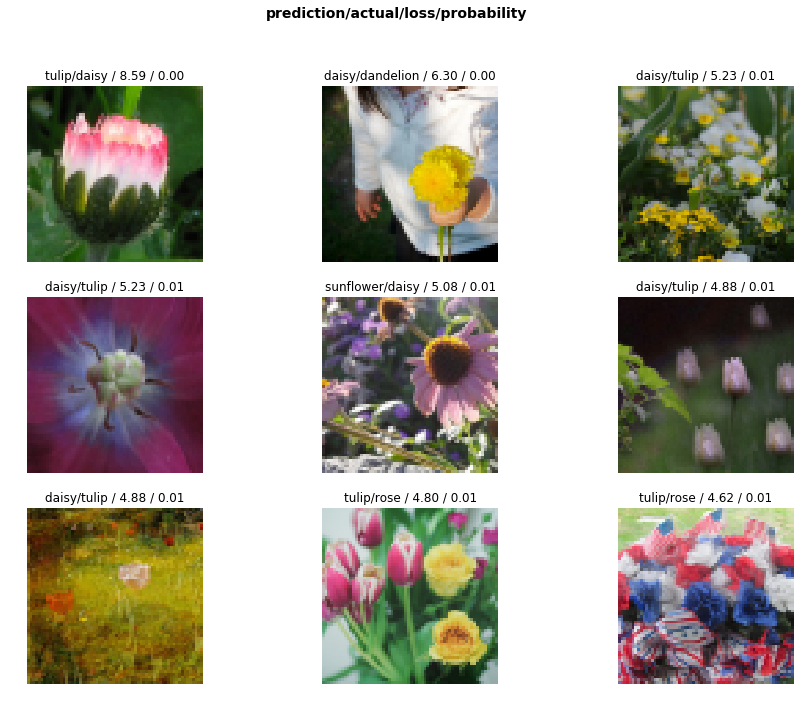

In [96]:
interp.plot_top_losses(9, figsize=(15,11))

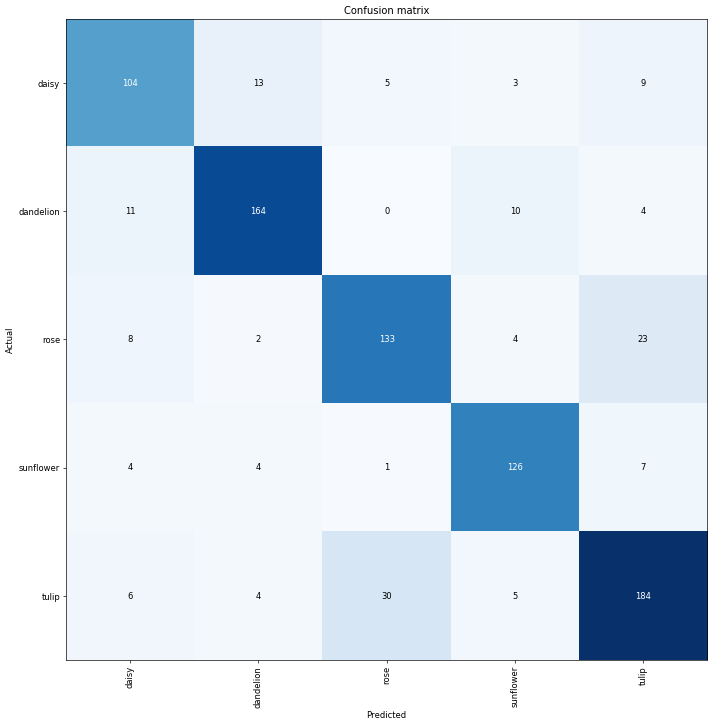

In [97]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [98]:
interp.most_confused(min_val=2)

[('tulip', 'rose', 30),
 ('rose', 'tulip', 23),
 ('daisy', 'dandelion', 13),
 ('dandelion', 'daisy', 11),
 ('dandelion', 'sunflower', 10),
 ('daisy', 'tulip', 9),
 ('rose', 'daisy', 8),
 ('sunflower', 'tulip', 7),
 ('tulip', 'daisy', 6),
 ('daisy', 'rose', 5),
 ('tulip', 'sunflower', 5),
 ('dandelion', 'tulip', 4),
 ('rose', 'sunflower', 4),
 ('sunflower', 'daisy', 4),
 ('sunflower', 'dandelion', 4),
 ('tulip', 'dandelion', 4),
 ('daisy', 'sunflower', 3),
 ('rose', 'dandelion', 2)]

In [99]:
learn.unfreeze()

In [100]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.553202,0.512792,0.181713,00:28


In [101]:
learn.load('stage-1');

In [102]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


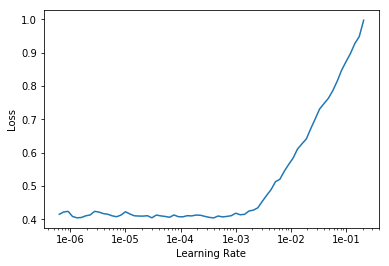

In [103]:
learn.recorder.plot()

In [104]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.511802,0.473286,0.159722,00:28
1,0.385964,0.374364,0.136574,00:31
